In [7]:
import cirq
import qsimcirq
import numpy as np
from qiskit.visualization import plot_histogram
from encoded.dj import dj

In [16]:

noise_p = 0.01
n_shots = 10000
total_qubits = 10


qreg = cirq.LineQubit.range(total_qubits)
circuit, type_, value_ = dj(qreg)
circuit.append(cirq.measure(qreg[:total_qubits-1], key="m"))

c_m = circuit.copy()
if noise_p > 0.0:
    c_m = c_m.with_noise(cirq.depolarize(p=noise_p))
s = qsimcirq.QSimSimulator()
samples = s.run(c_m, repetitions=n_shots)
counts = samples.histogram(key="m")
results = {}
for key in counts.keys():
    results[key] = counts[key]

print(circuit)
print("type is " + str(type_) + " value is " + str(value_))
print(results)

0: ───H───H───M('m')───
              │
1: ───H───H───M────────
              │
2: ───H───H───M────────
              │
3: ───H───H───M────────
              │
4: ───H───H───M────────
              │
5: ───H───H───M────────
              │
6: ───H───H───M────────
              │
7: ───H───H───M────────
              │
8: ───H───H───M────────

9: ───X───H────────────
type is 0 value is 0
{0: 8964, 1: 108, 16: 115, 128: 115, 32: 105, 4: 115, 8: 99, 64: 117, 34: 3, 2: 110, 24: 1, 256: 106, 384: 1, 273: 1, 264: 1, 130: 1, 258: 2, 132: 1, 9: 1, 12: 2, 65: 3, 10: 2, 68: 4, 288: 2, 20: 2, 320: 1, 96: 1, 6: 3, 192: 1, 257: 2, 160: 1, 48: 2, 5: 1, 33: 1, 129: 1, 66: 1, 36: 1, 136: 1, 272: 1, 144: 1}


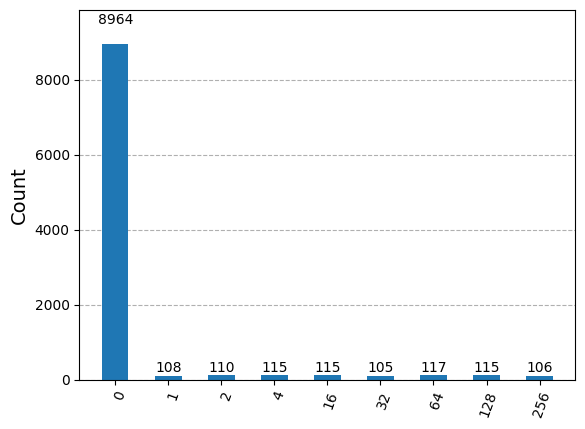

In [ ]:
threshold = int(0.01 * n_shots) # the threshold of plotting significant measurements, 1% of the default number of shots, 1024
filteredAnswer = {k: v for k,v in results.items() if v >= threshold} # filter the answer for better view of plots
removedCounts = np.sum([ v for k,v in results.items() if v < threshold ]) # number of counts removed 
plot_histogram(filteredAnswer)